In [20]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

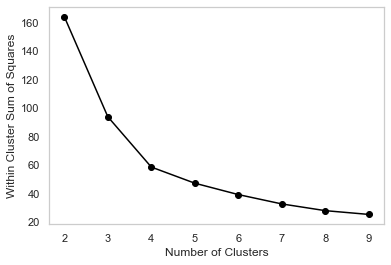

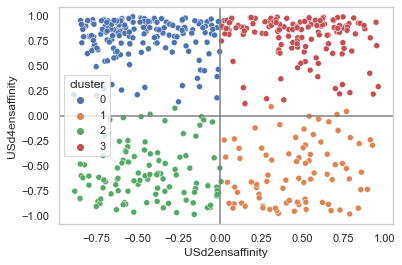

In [71]:
p = r"E:\OFL\one-p experiment\data\Ensemble affinity for RO.csv"
df = pd.read_csv(p)[["Cell ID", "USd2ensaffinity", "USd4ensaffinity", "ROresponse_day2_us"]].dropna()


X = df[["USd2ensaffinity", "USd4ensaffinity"]].copy()


from sklearn.cluster import KMeans

error = []
n_clusters = list(range(2, 10))
for i in n_clusters:
    error.append(KMeans(i).fit(X).inertia_)

plt.plot(n_clusters, error, color="black")
plt.scatter(n_clusters, error, color="black")
plt.grid(b=None)
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.savefig("Kmeans Elbow.svg")


##

plt.figure()
mod = KMeans(4).fit(X)
plt.grid(b=None)

X["cluster"] = pd.Categorical(mod.predict(X))
ax = sns.scatterplot(data=X, x="USd2ensaffinity", y="USd4ensaffinity", hue="cluster")
ax.axhline(0, color="grey")
ax.axvline(0, color="grey")
plt.savefig("KMeans Scatter.svg")


X.merge(df).to_csv("KMeans_Affinity.csv", index=False)

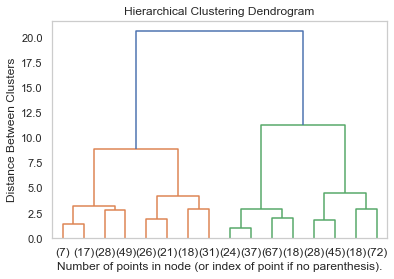

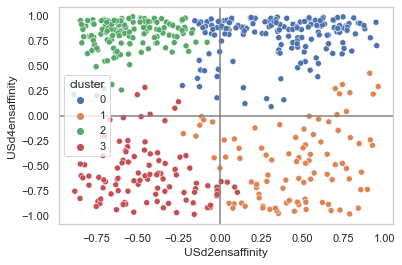

In [70]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)





X = df[["USd2ensaffinity", "USd4ensaffinity"]].copy()

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plt.grid(b=None)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance Between Clusters")
plt.savefig("Hierarchical Dendrogram.svg")



plt.figure()
model = AgglomerativeClustering(distance_threshold=None, n_clusters=4)
plt.grid(b=None)

X["cluster"] = pd.Categorical(model.fit_predict(X))
ax = sns.scatterplot(data=X, x="USd2ensaffinity", y="USd4ensaffinity", hue="cluster")
ax.axhline(0, color="grey")
ax.axvline(0, color="grey")
plt.savefig("Hierarchical Scatter.svg")


X.merge(df).to_csv("HierarchicalClustering_Affinity.csv", index=False)

In [15]:
X.dropna()

,USd2ensaffinity,USd4ensaffinity
0,0.811462,0.975466
1,0.363583,-0.090551
2,0.509212,-0.667592
3,-0.586003,-0.445877
4,0.387806,0.157706
...,...,...
501,0.303480,-0.936466
502,0.547478,0.454023
503,-0.424176,0.878840
504,-0.304619,-0.711556


In [ ]:
import observational_fear.load as load
from observational_fear.nbox_transforms import summarize_prepost_events, wilcoxon_by_cell
from observational_fear.events import get_block_starts
from observational_fear.stats import auc
from neurobox.wide_transforms import resample
from pathlib import Path


DATA_DIR = Path(r"D:\OFL\one-p experiment\data")
FIG_DIR = Path(r"C:\Users\roryl\repos\observational-fear\figs")